<a href="https://colab.research.google.com/github/sirbob12/image_classification_CNN/blob/main/image_classification_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project: Image classification project using CNN (CIFAR-10 DATASET)
### 1. Introduction
#### In this project, we build a Convolutional Neural Network (CNN) to classify images from the CIFAR-10 dataset — a collection of 60,000 images across 10 categories:
#### Airplane, Automobile, Bird, Cat, Deer, Dog, Frog, Horse, Ship, Truck
#### The goal is to build an efficient image classifier capable of recognizing objects from these categories.



#### Libraries and Tools
#### Lets import the necessary python libraries and tools for this project

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


### Import dataset

In [10]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

### Data pre-processing

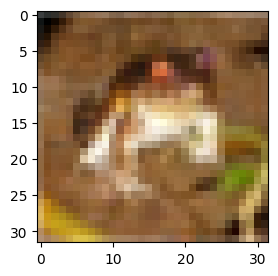

In [13]:
plt.figure(figsize=(4,3))
plt.imshow(X_train[0])


In [14]:
## Classnames for visualization
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

In [16]:
X_train.max(), X_test.max()

(np.uint8(255), np.uint8(255))

In [17]:
### Lets normalize the data
X_train = X_train / 255.0
X_test = X_test / 255.0
X_test.shape, y_test.shape

((10000, 32, 32, 3), (10000, 1))

In [19]:
X_train.max()

np.float64(1.0)

### Visualization
#### Lets display some of the images

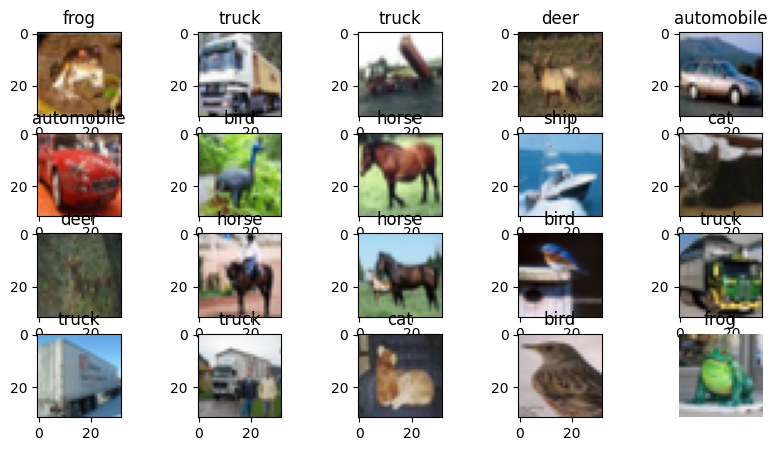

In [20]:
plt.figure(figsize=(10,5))
for i in range(20):
  plt.subplot(4,5,i+1)
  plt.imshow(X_train[i])
  plt.title(class_names[y_train[i][0]])
plt.axis('off')
plt.show()


## Model development
#### Lets build the CNN model to predict the names of our images

In [21]:
## Lets design the cnn model to predict the names of our images
model_1 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model_1.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 2, 2, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 73,418 (286.79 KB)

 Trainable params: 73,418 (286.79 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
model_1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model_1.fit(X_train, y_train, epochs=10,
                    validation_data=(X_test, y_test))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.3358 - loss: 1.7880 - val_accuracy: 0.5421 - val_loss: 1.2724
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5691 - loss: 1.2078 - val_accuracy: 0.6137 - val_loss: 1.0914
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6335 - loss: 1.0454 - val_accuracy: 0.6417 - val_loss: 1.0269
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6707 - loss: 0.9417 - val_accuracy: 0.6521 - val_loss: 0.9911
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6916 - loss: 0.8726 - val_accuracy: 0.6774 - val_loss: 0.9407
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7187 - loss: 0.8120 - val_accuracy: 0.6862 - val_loss: 0.9168
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7344 - loss: 0.7656 - val_accuracy: 0.6891 - val_loss: 0.8962
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7470 - loss: 0.7222 

## Evaluation
#### Lets eveluate the model to see its performance

In [33]:
test_loss, test_accuracy = model_1.evaluate(X_test, y_test , verbose=2)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")
print(f"Test Loss: {test_loss *100:.2f}%")

313/313 - 1s - 2ms/step - accuracy: 0.6820 - loss: 0.9504
Test accuracy: 68.20%
Test Loss: 95.04%


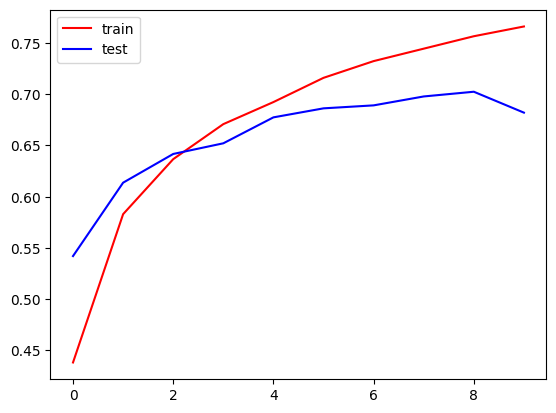

In [23]:
### Lets eveluate the model to see performance
plt.plot(history.history['accuracy'], c='red', label='train')
plt.plot(history.history['val_accuracy'], c='blue', label='test')
plt.legend()
plt.show()


#### The model is not performing well at all... so we need to hypertune the model to improve its performance
#### The accuracy here is very poor

In [34]:
model_2 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    #layers.Conv2D(64, (3, 3), activation='relu'),
    #layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model_2.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │         147,520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 167,562 (654.54 KB)

 Trainable params: 167,562 (654.54 KB)

 Non-trainable params: 0 (0.00 B)

In [40]:
model_2.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history_1 = model_2.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8633 - loss: 0.3895 - val_accuracy: 0.6846 - val_loss: 1.1347
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8678 - loss: 0.3655 - val_accuracy: 0.6892 - val_loss: 1.1627
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8733 - loss: 0.3525 - val_accuracy: 0.6892 - val_loss: 1.1844
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8865 - loss: 0.3254 - val_accuracy: 0.6885 - val_loss: 1.2313
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8887 - loss: 0.3162 - val_accuracy: 0.6870 - val_loss: 1.2744
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8890 - loss: 0.3064 - val_accuracy: 0.6871 - val_loss: 1.3377
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8989 - loss: 0.2912 - val_accuracy: 0.6826 - val_loss: 1.3517
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8992 - loss: 0.2820

In [41]:
model_2.evaluate(X_test, y_test , verbose=2)

313/313 - 1s - 2ms/step - accuracy: 0.6716 - loss: 1.4978


[1.4977694749832153, 0.6715999841690063]

In [43]:
### Lets use the model to predict
y_pred = model_2.predict(X_test)
y_pred.shape
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[3.28913484e-06, 2.12057518e-08, 7.59242482e-07, 3.20800722e-01,
        6.67230404e-09, 6.79034412e-01, 4.59067762e-09, 6.63622757e-07,
        1.60137075e-04, 2.55740679e-10],
       [3.08724907e-07, 1.92266671e-04, 5.76471626e-09, 6.50099007e-14,
        9.79722098e-15, 2.75077631e-18, 1.03874688e-23, 2.54736401e-14,
        9.99807417e-01, 4.13498717e-13],
       [1.89156041e-01, 3.29955406e-02, 1.96137815e-04, 3.44170730e-05,
        1.00537292e-07, 6.78311665e-08, 2.05427959e-08, 5.70462998e-06,
        7.77020752e-01, 5.91285701e-04],
       [9.87623453e-01, 1.33192656e-03, 6.66121533e-03, 6.12132817e-06,
        6.09582958e-06, 5.88316640e-09, 4.47374610e-10, 1.46345949e-08,
        4.37096972e-03, 1.01588675e-07],
       [5.59238766e-10, 1.07858890e-04, 7.90249277e-03, 6.47662964e-04,
        9.38312352e-01, 6.45254840e-05, 5.29611818e-02, 6.51624501e-12,
        3.95820643e-06, 1.04729446e-11]], dtype=float32)

In [45]:
### Lets still try to improve the model
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.1
)

In [51]:
model_3 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])



# Compile the model
model_3.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Set callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.00001)

# Train the model
history = model_3.fit(datagen.flow(X_train, y_train, batch_size=64),
                    epochs=50,
                    validation_data=(X_test, y_test),
                    callbacks=[early_stop, reduce_lr])


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 46ms/step - accuracy: 0.2519 - loss: 1.9833 - val_accuracy: 0.4969 - val_loss: 1.3888 - learning_rate: 0.0010
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 42ms/step - accuracy: 0.4265 - loss: 1.5762 - val_accuracy: 0.5351 - val_loss: 1.2674 - learning_rate: 0.0010
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 42s 42ms/step - accuracy: 0.4857 - loss: 1.4395 - val_accuracy: 0.5872 - val_loss: 1.1651 - learning_rate: 0.0010
Epoch 4/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 42ms/step - accuracy: 0.5214 - loss: 1.3613 - val_accuracy: 0.5885 - val_loss: 1.1695 - learning_rate: 0.0010
Epoch 5/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 41ms/step - accuracy: 0.5485 - loss: 1.2940 - val_accuracy: 0.6232 - val_loss: 1.0486 - learning_rate: 0.0010
Epoch 6/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 34s 43ms/step - accuracy: 0.5602 - loss: 1.2518 - val_accuracy: 0.6320 - val_loss: 1.0313 - learning_rate: 0.0010
Epoch 7/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 41ms/step - accuracy: 0.5735 - loss: 1.2161